<a href="https://colab.research.google.com/github/Raylow00/NYC-Property-Sales-data-visualization/blob/master/NYC_Property_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats

In [0]:
DATASET_PATH = '/content/drive/My Drive/Colab/Machine Learning/Practice/Datasets/nyc-rolling-sales.csv'

data = pd.read_csv(DATASET_PATH)
data.head(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [0]:
del data['EASE-MENT']   # column is empty
del data['Unnamed: 0']  # not relevant, might be an iterator
del data['SALE DATE']


In [0]:
# Check for duplicated entries
sum(data.duplicated(data.columns))

1358

In [0]:
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [0]:
data.shape

(83190, 19)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83190 entries, 0 to 84547
Data columns (total 19 columns):
BOROUGH                           83190 non-null int64
NEIGHBORHOOD                      83190 non-null object
BUILDING CLASS CATEGORY           83190 non-null object
TAX CLASS AT PRESENT              83190 non-null object
BLOCK                             83190 non-null int64
LOT                               83190 non-null int64
BUILDING CLASS AT PRESENT         83190 non-null object
ADDRESS                           83190 non-null object
APARTMENT NUMBER                  83190 non-null object
ZIP CODE                          83190 non-null int64
RESIDENTIAL UNITS                 83190 non-null int64
COMMERCIAL UNITS                  83190 non-null int64
TOTAL UNITS                       83190 non-null int64
LAND SQUARE FEET                  83190 non-null object
GROSS SQUARE FEET                 83190 non-null object
YEAR BUILT                        83190 non-null int64
TAX

In [0]:
# Convert some columns to the appropriate datatype

data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')

data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')

data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

data['BOROUGH'] = data['BOROUGH'].astype('category')

In [0]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0


In [0]:
data.columns[data.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [0]:
miss = data.isnull().sum() / len(data)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.167196
LAND SQUARE FEET     0.312213
GROSS SQUARE FEET    0.327888
dtype: float64

In [0]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index
miss

,count,Name
Name,,
SALE PRICE,0.167196,SALE PRICE
LAND SQUARE FEET,0.312213,LAND SQUARE FEET
GROSS SQUARE FEET,0.327888,GROSS SQUARE FEET


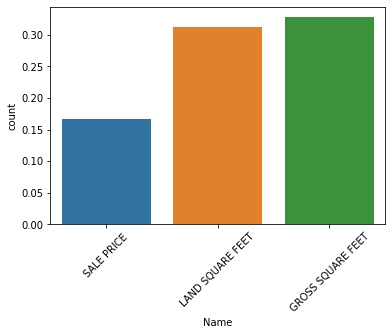

In [0]:
sns.barplot(x='Name', y='count', data=miss)
plt.xticks(rotation=45)
plt.show()

In [0]:
# Fill up the columns with mean values except for SALE PRICE, which we will predict the empty values

data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())

data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())

In [0]:
# Splitting dataset

test = data[data['SALE PRICE'].isna()]
data = data[~data['SALE PRICE'].isna()]

In [0]:
test = test.drop(columns='SALE PRICE')
test.shape

(13909, 18)

In [0]:
test.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5


In [0]:
data.shape

(69281, 19)

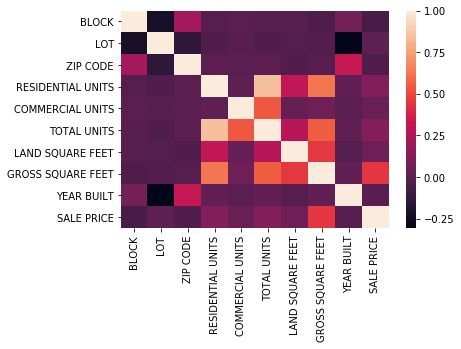

In [0]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

In [0]:
# We look at the last row to see the correlation of different features with SALE PRICE

corr['SALE PRICE'].sort_values(ascending=False)


SALE PRICE           1.000000
GROSS SQUARE FEET    0.449913
TOTAL UNITS          0.126654
RESIDENTIAL UNITS    0.122566
LAND SQUARE FEET     0.060143
COMMERCIAL UNITS     0.044535
LOT                  0.012266
YEAR BUILT          -0.003779
ZIP CODE            -0.034110
BLOCK               -0.061357
Name: SALE PRICE, dtype: float64

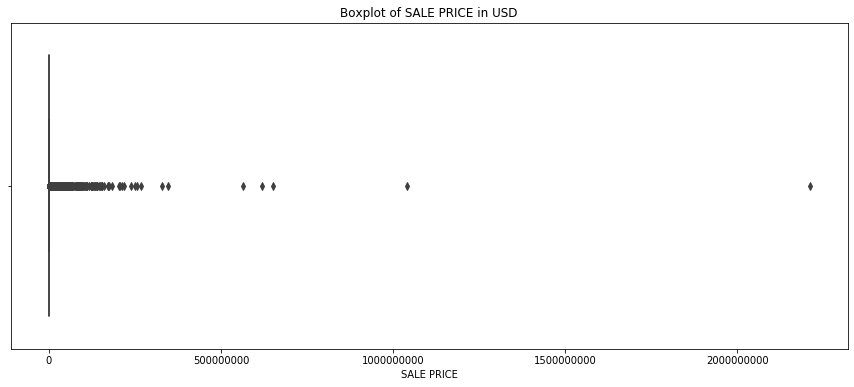

In [0]:
# Box plot of SALE PRICE

plt.figure(figsize=(15, 6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

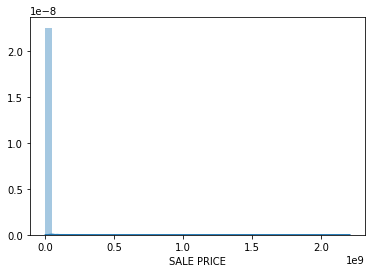

In [0]:
sns.distplot(data['SALE PRICE'])

In [0]:
# Remove observations that fall outside the caps

data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

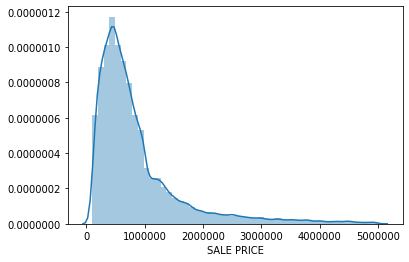

In [0]:
sns.distplot(data['SALE PRICE'])

In [0]:
# Let's check the skewness of the SALE PRICE

data['SALE PRICE'].skew()

2.3437455096169386

In [0]:
# Very highly right-skewed, so we will log transform it

sales = np.log(data['SALE PRICE'])
sales.skew()

0.19896303705046872

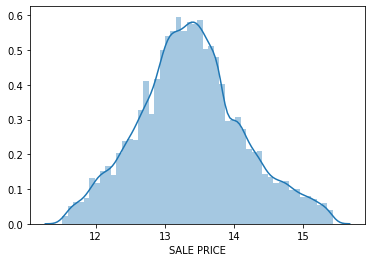

In [0]:
sns.distplot(sales)

In [0]:
# It is symmetrical now, thus normalized

----------------------------

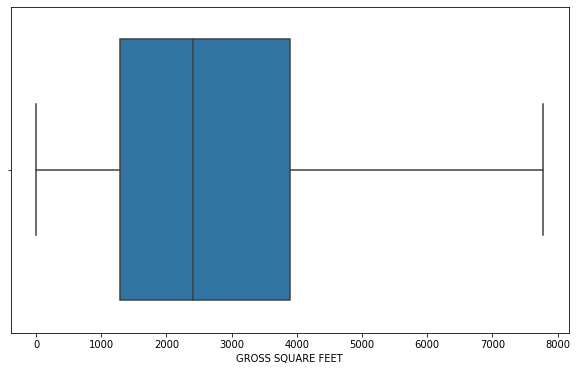

In [0]:
# Visualizing numerical data

plt.figure(figsize=(10, 6))
sns.boxplot(x='GROSS SQUARE FEET', data=data, showfliers=False)

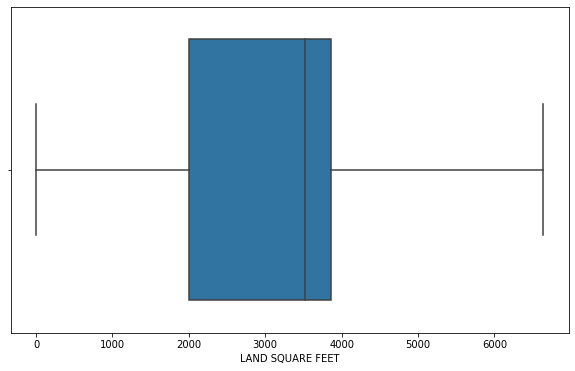

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LAND SQUARE FEET', data=data, showfliers=False)

In [0]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

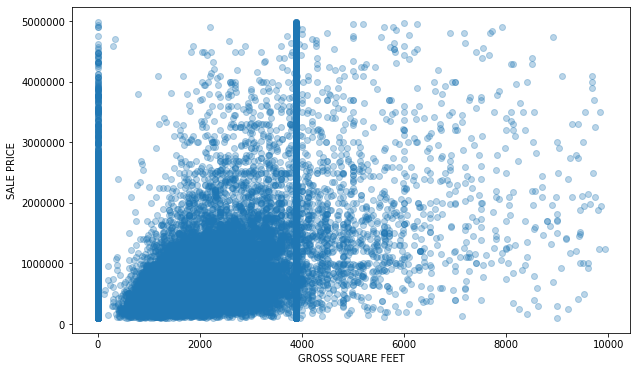

In [0]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

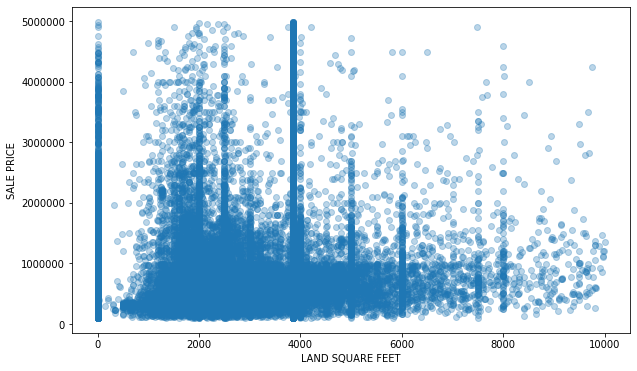

In [0]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

In [0]:
# Total units

data[['TOTAL UNITS', 'SALE PRICE']].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,24570
0,0,15489
2,2,9473
3,3,2720
4,4,695
6,6,360
5,5,170
8,8,133
7,7,70
9,9,56


In [0]:
# Removing rows with Total Units == 0 and one outlier with 2261 units

data = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] != 2261)]

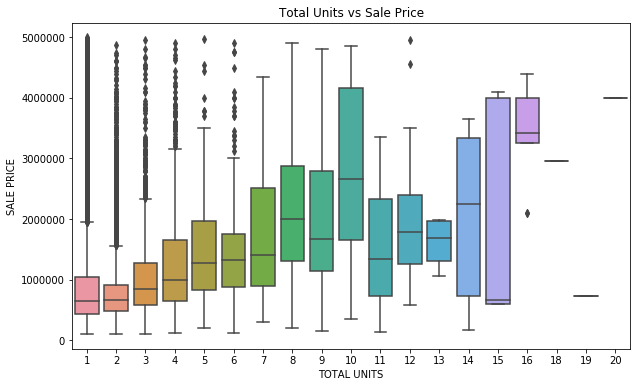

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data)
plt.title('Total Units vs Sale Price')
plt.show()

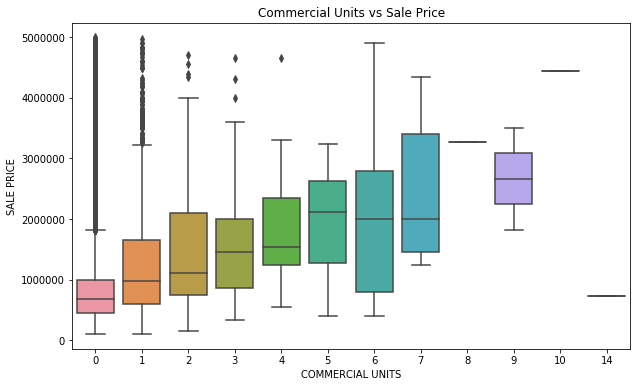

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)
plt.title('Commercial Units vs Sale Price')
plt.show()

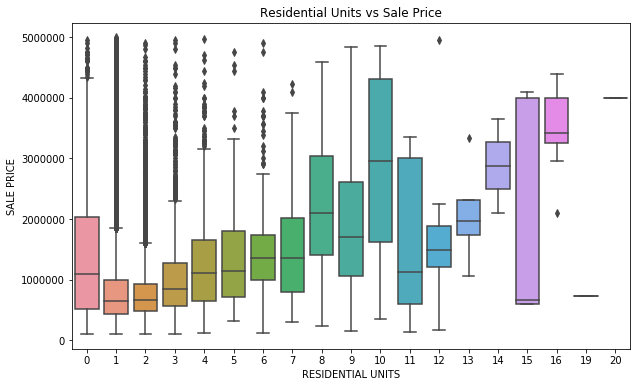

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)
plt.title('Residential Units vs Sale Price')
plt.show()

-----------------

Let's visualize Categorical data

In [0]:
cat_data = data.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,38342,38342,38342,38342,38342,38342,38342,38342,38342
unique,5,247,36,9,104,30426,2642,3,104
top,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,R4,131-05 40TH ROAD,,1,R4
freq,12599,1674,12215,23977,8918,209,26395,25206,8922


In [0]:
# Tax Class at present

data['TAX CLASS AT PRESENT'].unique()

[2B, 2, 2A, 2C, 4, 1C, 1, 1A, 1B]
Categories (9, object): [2B, 2, 2A, 2C, ..., 1C, 1, 1A, 1B]

In [0]:
pivot = data.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)

pivot

,SALE PRICE
TAX CLASS AT PRESENT,
1,594000.0
1A,390000.0
1B,640606.5
1C,958668.0
2,980000.0
2A,1200000.0
2B,1847500.0
2C,835000.0
4,1050000.0


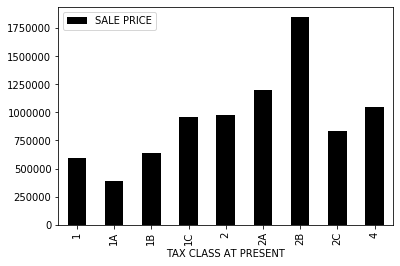

In [0]:
pivot.plot(kind='bar', color='black')

In [0]:
# Tax class at time of sale

data['TAX CLASS AT TIME OF SALE'].unique()

[2, 4, 1]
Categories (3, int64): [2, 4, 1]

In [0]:
pivot = data.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,582487.5
2,990000.0
4,1050000.0


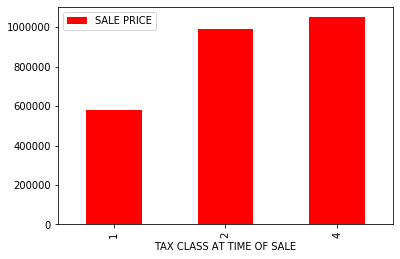

In [0]:
pivot.plot(kind='bar', color='red')

In [0]:
# Borough

data['BOROUGH'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

In [0]:
pivot = data.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BOROUGH,
1,1435000.0
2,452750.0
3,860000.0
4,635000.0
5,470000.0


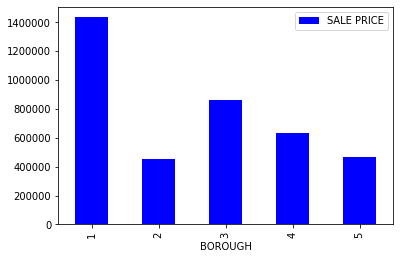

In [0]:
pivot.plot(kind='bar', color='blue')

In [0]:
# Building class category

print(data['BUILDING CLASS CATEGORY'].nunique())

36


In [0]:
pivot = data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,510000.0
02 TWO FAMILY DWELLINGS,664075.5
03 THREE FAMILY DWELLINGS,820000.0
04 TAX CLASS 1 CONDOS,420405.0
05 TAX CLASS 1 VACANT LAND,720000.0
06 TAX CLASS 1 - OTHER,500000.0
07 RENTALS - WALKUP APARTMENTS,1280000.0
08 RENTALS - ELEVATOR APARTMENTS,3670000.0
11A CONDO-RENTALS,999000.0


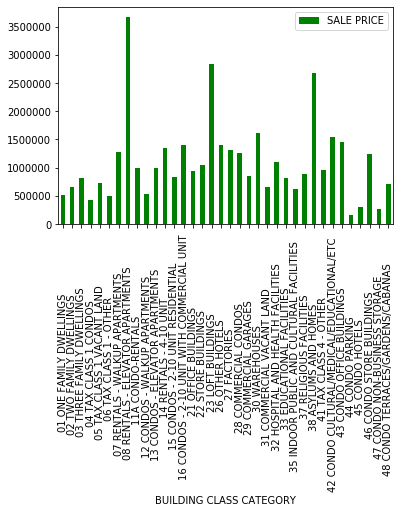

In [0]:
pivot.plot(kind='bar', color='Green')


--------------------------

Data Preprocessing

In [0]:
del data['ADDRESS']
del data['APARTMENT NUMBER']

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 17 columns):
BOROUGH                           38342 non-null category
NEIGHBORHOOD                      38342 non-null object
BUILDING CLASS CATEGORY           38342 non-null object
TAX CLASS AT PRESENT              38342 non-null category
BLOCK                             38342 non-null int64
LOT                               38342 non-null int64
BUILDING CLASS AT PRESENT         38342 non-null object
ZIP CODE                          38342 non-null int64
RESIDENTIAL UNITS                 38342 non-null int64
COMMERCIAL UNITS                  38342 non-null int64
TOTAL UNITS                       38342 non-null int64
LAND SQUARE FEET                  38342 non-null float64
GROSS SQUARE FEET                 38342 non-null float64
YEAR BUILT                        38342 non-null int64
TAX CLASS AT TIME OF SALE         38342 non-null category
BUILDING CLASS AT TIME OF SALE    38342 non-null o

In [0]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,38342.000000,38342.000000,38342.000000,38342.000000,38342.000000,38342.000000,38342.000000,38342.000000,38342.000000,3.834200e+04
mean,4690.743362,470.294168,10904.489828,1.513067,0.059700,1.581895,2786.907023,2227.495323,1828.514892,9.188105e+05
std,3733.782256,718.246919,620.989034,1.096822,0.341536,1.139295,1549.224091,1406.111123,478.808260,7.654428e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.007000e+05
25%,1532.000000,28.000000,10312.000000,1.000000,0.000000,1.000000,1942.000000,1280.000000,1920.000000,4.590000e+05
50%,4019.000000,62.000000,11214.000000,1.000000,0.000000,1.000000,2600.000000,1978.000000,1940.000000,6.800000e+05
75%,6799.000000,1030.000000,11360.000000,2.000000,0.000000,2.000000,3858.418040,3840.000000,1987.000000,1.055000e+06
max,16319.000000,9106.000000,11694.000000,20.000000,14.000000,20.000000,9996.000000,9926.000000,2017.000000,4.996841e+06


In [0]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [0]:
# Transform the numeric features using log(x+1)

from scipy.stats import skew

skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed

BLOCK                 0.917624
LOT                   2.828267
RESIDENTIAL UNITS     4.185514
COMMERCIAL UNITS     10.859858
TOTAL UNITS           4.282814
SALE PRICE            2.349170
dtype: float64

In [0]:
skewed.index

Index(['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'SALE PRICE'],
      dtype='object')

In [0]:
skewed = skewed.index

In [0]:
data[skewed] = np.log1p(data[skewed])

In [0]:
scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

In [0]:
for i, col in enumerate(numeric_data.columns):
  data[col] = scaled[:, i]

In [0]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.552838,-0.871424,C4,-1.442057,4.726583,-0.204406,4.897089,-0.332369,3.247655,0.176451,2,C4,2.478171
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.545023,-0.654228,C4,-1.442057,4.109626,-0.204406,4.245205,-0.669316,1.421318,0.191071,2,C4,2.174164
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,-1.584890,1.174680,R2,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,-3.818937,2,R2,-0.206132
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175214,R4,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,2,R4,0.094653
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175747,R4,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,2,R4,0.113914


In [0]:
del data['BUILDING CLASS AT PRESENT']
del data['BUILDING CLASS AT TIME OF SALE']
del data['NEIGHBORHOOD']


In [0]:
# One hot encoding categorical columns

one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']

one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded

,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,TAX CLASS AT PRESENT_,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
79,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
84540,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
84543,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
84544,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
# Replacing categorical columns with the dummies

fdf = data.drop(one_hot_features, axis=1)
fdf = pd.concat([fdf, one_hot_encoded], axis=1)

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 66 columns):
BLOCK                                                                   38342 non-null float64
LOT                                                                     38342 non-null float64
ZIP CODE                                                                38342 non-null float64
RESIDENTIAL UNITS                                                       38342 non-null float64
COMMERCIAL UNITS                                                        38342 non-null float64
TOTAL UNITS                                                             38342 non-null float64
LAND SQUARE FEET                                                        38342 non-null float64
GROSS SQUARE FEET                                                       38342 non-null float64
YEAR BUILT                                                              38342 non-null float64
SALE PRICE                          

---------------------------

Train Test Split

In [0]:
y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

print(X_fdf.shape, y_fdf.shape)

(38342, 65) (38342,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_fdf, y_fdf, test_size=0.3, random_state=34)


In [0]:
print('X_train: ', X_train.shape)
print('Y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('Y_test: ', y_test.shape)

X_train:  (26839, 65)
Y_train:  (26839,)
X_test:  (11503, 65)
Y_test:  (11503,)


In [0]:
# Defining the Error function first - THE LOWER THE BETTER!

def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))


In [0]:
# Linear regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
rmse(y_test, y_pred_linreg)

0.7535412926078288

In [0]:
# Lasso regression

alpha = 0.00099
lasso_reg = Lasso(alpha=alpha, max_iter=50000)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse(y_test, y_pred_lasso)

0.7545342173339241

In [0]:
# Ridge regression

ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse(y_test, y_pred_ridge)

0.7536328245407319

In [0]:
# Random Forest Regressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse(y_test, y_pred_rf)

0.5671277750728542

Random Forest Regressor has the lowest root mean squared error among the 4 regressors.